# Introduction to Hyperparameter Optimization with Genetic Algorithms

## Overview
Hyperparameter Optimization (HPO) is a crucial step in machine learning workflows, aiming to enhance model performance by tuning its hyperparameters. Genetic Algorithms (GAs) are a class of optimization algorithms inspired by the principles of natural selection and evolution. They are particularly suited for exploring large and complex hyperparameter spaces where traditional optimization techniques may struggle.

## Why Use Genetic Algorithms for HPO?
GAs leverage concepts such as mutation, crossover, and selection to evolve a population of candidate solutions over generations. They are effective for HPO because:

- **Non-Differentiable Functions**: GAs do not require gradient information, making them suitable for models with non-differentiable or complex objective functions.
- **Global Search Capability**: GAs can escape local optima by introducing diversity through mutation, providing a better chance of finding the global optimum.
- **Flexibility**: GAs handle both discrete and continuous hyperparameter spaces and can incorporate constraints.

## Key Concepts in Genetic Algorithms

1. **Population**:
   - A set of candidate solutions, where each individual represents a possible combination of hyperparameters.

2. **Fitness Function**:
   - A function that evaluates the quality of each individual based on the objective (e.g., validation accuracy).

3. **Selection**:
   - A mechanism to choose individuals for reproduction based on their fitness. Common strategies include tournament selection and roulette wheel selection.

4. **Crossover**:
   - A process to combine the genetic material (hyperparameter values) of two parent solutions to produce offspring.

5. **Mutation**:
   - A process to introduce random changes to individuals, ensuring diversity and preventing premature convergence.

6. **Generations**:
   - Iterative cycles where the population evolves through selection, crossover, and mutation.

## Applying Genetic Algorithms to HPO
To use GAs for HPO, follow these steps:

1. **Define the Search Space**:
   - Specify the range and types of hyperparameters, such as integers, floats, or categorical values.

2. **Initialize the Population**:
   - Randomly generate a set of candidate solutions within the search space.

3. **Define the Fitness Function**:
   - Measure the performance of each solution, often using cross-validation or validation set accuracy.

4. **Evolutionary Process**:
   - Use selection, crossover, and mutation to evolve the population over generations.

5. **Convergence**:
   - Stop the algorithm when a predefined number of generations is reached or when the improvement in fitness stalls.

## Advantages of Genetic Algorithms for HPO
- **Robustness**: Handles noisy objective functions and irregular search spaces.
- **Parallelization**: Evaluations of individuals can be distributed across multiple processors.
- **Adaptability**: Works well with both structured and unstructured search spaces.

## Limitations
- **Computational Cost**: Evaluating the fitness of individuals can be expensive, especially for large models or datasets.
- **Parameter Tuning**: GAs themselves have hyperparameters (e.g., population size, mutation rate) that need careful tuning.
- **Convergence Speed**: May require many generations to converge to an optimal solution.

## Example Use Case: Random Forest Classifier
In the context of optimizing a Random Forest Classifier, GAs can explore hyperparameters such as:
- Number of trees (`n_estimators`)
- Maximum tree depth (`max_depth`)
- Minimum samples per split (`min_samples_split`)
- Criterion for split quality (`gini`, `entropy`)

By representing these hyperparameters as genes in an individual's chromosome, GAs evolve solutions to maximize model accuracy on a validation set.

In [1]:
import openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pygad
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load dataset from OpenML
def load_openml_dataset(dataset_id):
    dataset = openml.datasets.get_dataset(dataset_id)
    X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
    return X, y

In [3]:
# Define mapping for categorical values
criterion_map = {0: "gini", 1: "entropy"}

# Update the fitness function
def fitness_function(ga_instance, solution, solution_idx):
    n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion_idx = solution
    criterion = criterion_map[int(criterion_idx)]
    clf = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        criterion=criterion,
        random_state=42
    )
    clf.fit(X_train, y_train)
    preds = clf.predict(X_valid)
    acc = accuracy_score(y_valid, preds)
    return acc

In [4]:
# Define function to plot progress
def plot_progress(progress):
    plt.figure(figsize=(10, 6))
    plt.plot(progress, marker='o')
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Evolution of Fitness")
    plt.grid()
    plt.show()


In [5]:
# Load dataset (replace 37 with desired OpenML dataset ID)
dataset_id = 37 
X, y = load_openml_dataset(dataset_id)

# Split dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipykernel_269294/4089638376.py:3: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(dataset_id)


In [6]:
# Set up PyGAD parameters
num_generations = 20
num_parents_mating = 10
sol_per_pop = 20
num_genes = 5

# Update gene_space to use integers for the criterion
gene_space = [
    {'low': 50, 'high': 300, 'step': 1},   # n_estimators
    {'low': 5, 'high': 50, 'step': 1},     # max_depth
    {'low': 2, 'high': 20, 'step': 1},     # min_samples_split
    {'low': 1, 'high': 20, 'step': 1},     # min_samples_leaf
    {'low': 0, 'high': 1, 'step': 1}       # criterion (0 for gini, 1 for entropy)
]

In [7]:
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    save_best_solutions=True
)

# Run the Genetic Algorithm
ga_instance.run()


/home/boshkokoloski/miniconda3/lib/python3.11/site-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/home/boshkokoloski/miniconda3/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
/home/boshkokoloski/miniconda3/lib/python3.11/site-packages/pygad/pygad.py:1153: UserWarning: Use the 'sav

Best Solution: [182.   7.  16.  19.   0.]
Best Fitness: 0.7792207792207793


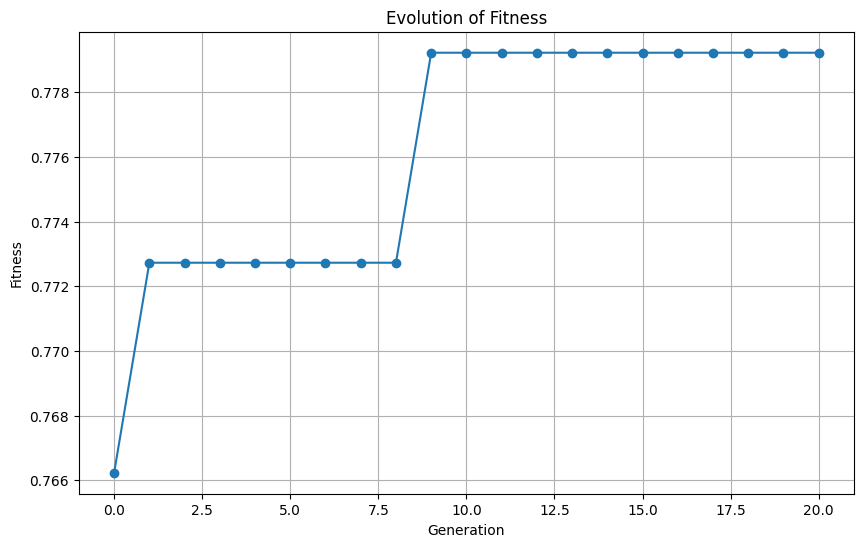

In [8]:
# Extract results
best_solution, best_solution_fitness, _ = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)
print("Best Solution:", best_solution)
print("Best Fitness:", best_solution_fitness)

# Plot progress
if hasattr(ga_instance, "best_solutions_fitness"):
    plot_progress(ga_instance.best_solutions_fitness)
else:
    print("No fitness progress data available to plot.")


In [9]:
# Train final model with best hyperparameters
final_model = RandomForestClassifier(
    n_estimators=int(best_solution[0]),
    max_depth=int(best_solution[1]),
    min_samples_split=int(best_solution[2]),
    min_samples_leaf=int(best_solution[3]),
    criterion=criterion_map[best_solution[4]],
    random_state=42
)
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_valid)
final_acc = accuracy_score(y_valid, final_preds)

print(f"Final Accuracy: {final_acc}")

Final Accuracy: 0.7792207792207793


In [10]:
best_solution, best_solution_fitness, _ = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)
print("Best Solution:", best_solution)
print("Best Fitness:", best_solution_fitness)

Best Solution: [182.   7.  16.  19.   0.]
Best Fitness: 0.7792207792207793
